In [1]:
### Comcast Telecom Complaints Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('setup Completed^___^')

setup Completed^___^


In [3]:
###!mkdir ~/.kaggle

In [4]:
###!cp /kaggle.json ~/.kaggle/

In [5]:
###!chmod 600 ~/.kaggle/kaggle.json

In [6]:
###! pip install kaggle

In [7]:
###!pip install keras-tuner

In [8]:
###! kaggle datasets download -d yasserh/comcast-telecom-complaints

In [9]:
###! unzip /content/comcast-telecom-complaints.zip

In [11]:
result = pd.read_csv('/content/Comcast.csv')
result.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [12]:
result.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [13]:
result.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [14]:
result.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [15]:
result.shape

(2224, 11)

In [16]:
train = result.iloc[:1900,:]
test = result.iloc[1900:,:]

In [17]:
print(train.shape)
print(test.shape)

(1900, 11)
(324, 11)


In [18]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [19]:
train2 = pd.read_csv("/content/train.csv", lineterminator='\n')

In [20]:
test2 = pd.read_csv("/content/test.csv", lineterminator='\n')

In [21]:
print(train2.columns)

Index(['Unnamed: 0', 'Ticket #', 'Customer Complaint', 'Date',
       'Date_month_year', 'Time', 'Received Via', 'City', 'State', 'Zip code',
       'Status', 'Filing on Behalf of Someone'],
      dtype='object')


In [22]:
print(test2.columns)

Index(['Unnamed: 0', 'Ticket #', 'Customer Complaint', 'Date',
       'Date_month_year', 'Time', 'Received Via', 'City', 'State', 'Zip code',
       'Status', 'Filing on Behalf of Someone'],
      dtype='object')


In [23]:
print(train2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1900 non-null   int64 
 1   Ticket #                     1900 non-null   object
 2   Customer Complaint           1900 non-null   object
 3   Date                         1900 non-null   object
 4   Date_month_year              1900 non-null   object
 5   Time                         1900 non-null   object
 6   Received Via                 1900 non-null   object
 7   City                         1900 non-null   object
 8   State                        1900 non-null   object
 9   Zip code                     1900 non-null   int64 
 10  Status                       1900 non-null   object
 11  Filing on Behalf of Someone  1900 non-null   object
dtypes: int64(2), object(10)
memory usage: 178.2+ KB
None


In [24]:
print(test2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   324 non-null    int64 
 1   Ticket #                     324 non-null    int64 
 2   Customer Complaint           324 non-null    object
 3   Date                         324 non-null    object
 4   Date_month_year              324 non-null    object
 5   Time                         324 non-null    object
 6   Received Via                 324 non-null    object
 7   City                         324 non-null    object
 8   State                        324 non-null    object
 9   Zip code                     324 non-null    int64 
 10  Status                       324 non-null    object
 11  Filing on Behalf of Someone  324 non-null    object
dtypes: int64(3), object(9)
memory usage: 30.5+ KB
None


In [25]:
train2["Date"]

0       22-04-15
1       04-08-15
2       18-04-15
3       05-07-15
4       26-05-15
          ...   
1895    26-05-15
1896    17-06-15
1897    24-06-15
1898    30-04-15
1899    04-07-15
Name: Date, Length: 1900, dtype: object

In [26]:
train2["Date"] = pd.to_datetime(train2["Date"])

In [27]:
test2["Date"] = pd.to_datetime(test2["Date"])

In [28]:
train2['year'] = train2['Date'].dt.year

In [29]:
train2['month'] = train2['Date'].dt.month

In [30]:
train2['day'] = train2['Date'].dt.day

In [31]:
test2['year'] = test2['Date'].dt.year
test2['month'] = test2['Date'].dt.month
test2['day'] = test2['Date'].dt.day

In [32]:
train2.drop(columns = "Date", inplace=True)

In [33]:
test2.drop(columns = "Date", inplace=True)

In [34]:
####! pip install unidecode

In [35]:
#####! pip install nltk

In [36]:
import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Needed only once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
def remove_slash_with_space(text):
    return text.replace('\\', " ")
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def text_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return  " ".join(text.split())
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
def stem_words(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return ' '.join(lemmas)

In [37]:
# Perform preprocessing
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
#    text = remove_punctuation(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
train2.columns

Index(['Unnamed: 0', 'Ticket #', 'Customer Complaint', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'year', 'month', 'day'],
      dtype='object')

In [40]:
train2['Customer Complaint'] = train2['Customer Complaint'].apply(perform_preprocessing)

<ipython-input-36-18fdfef6dc41>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [41]:
test2['Customer Complaint'] = test2['Customer Complaint'].apply(perform_preprocessing)

<ipython-input-36-18fdfef6dc41>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [42]:
####! pip install --upgrade pandas

In [43]:
np.version.version

'1.23.5'

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,top_k_accuracy_score
from sklearn import metrics

In [45]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [46]:
###! pip install nltk

In [47]:
###! pip install keras

In [48]:
import pandas, numpy, string, textblob
import pickle
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import xgboost
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import text, sequence
import matplotlib.pyplot as plt

In [49]:
####! pip install textblob

In [50]:
###! pip install keras

In [51]:
###! pip install tensorflow==2.7.0

In [52]:
##! pip install unidecode

In [53]:
import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Needed only once
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
def remove_slash_with_space(text):
    return text.replace('\\', " ")
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def text_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return  " ".join(text.split())
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
def stem_words(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return ' '.join(lemmas)

In [54]:
# Perform preprocessing
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

In [55]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [56]:
train2.columns

Index(['Unnamed: 0', 'Ticket #', 'Customer Complaint', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'year', 'month', 'day'],
      dtype='object')

In [57]:
###! pip install nlp_utils

In [58]:
###! pip install contractions

In [59]:
###! pip install wordcloud

In [60]:
train2.columns

Index(['Unnamed: 0', 'Ticket #', 'Customer Complaint', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'year', 'month', 'day'],
      dtype='object')

In [61]:
train2.rename(columns = {"Customer Complaint" : "CustomerComplaint"}, inplace=True)

In [62]:
test2.rename(columns = {"Customer Complaint" : "CustomerComplaint"}, inplace=True)

In [63]:
train_texts1 = " ".join(CustomerComplaint for CustomerComplaint in train2.CustomerComplaint)

In [64]:
test_texts1 = " ".join(CustomerComplaint for CustomerComplaint in test2.CustomerComplaint)

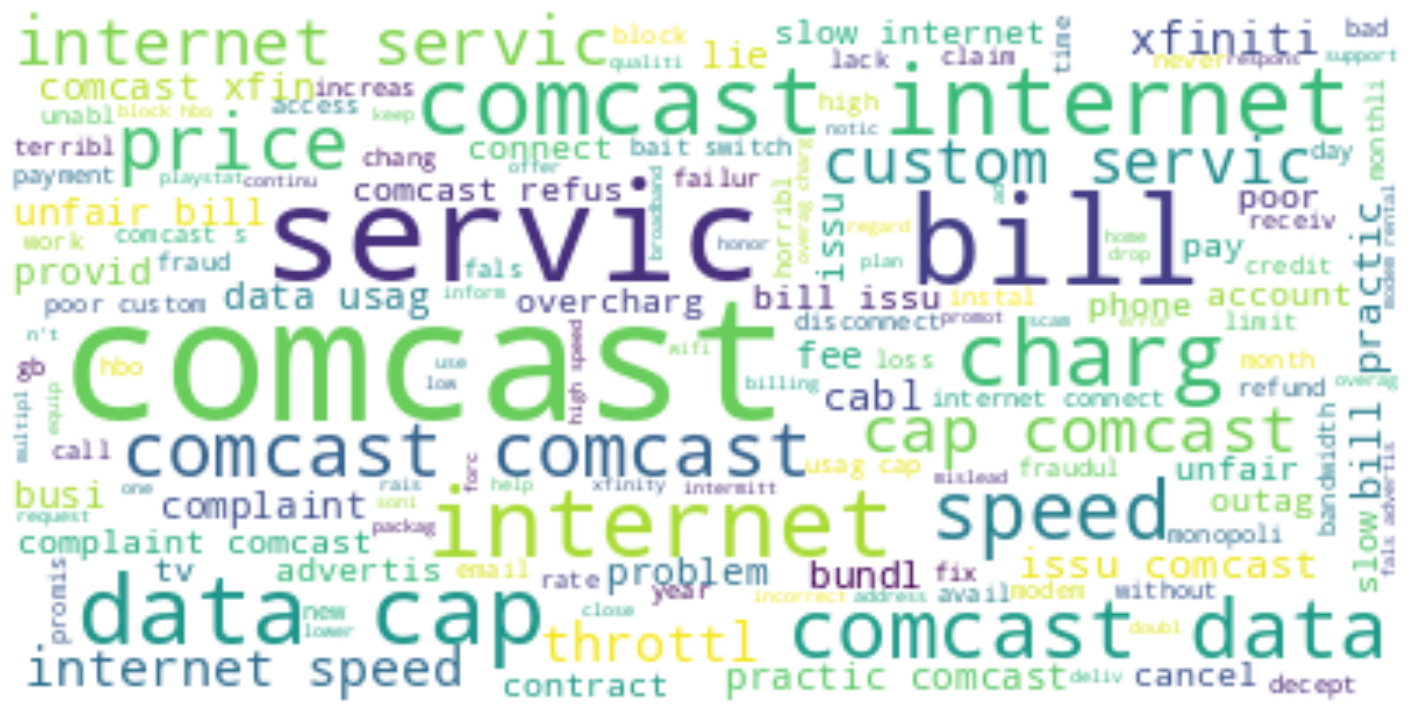

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(train_texts1)
plt.figure(figsize=(18, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
def showmostfrequentwords(text,no_of_words):

    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)

    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})

    df = wordsdf.nlargest(columns="count",n = no_of_words)

    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()

    return wordsdf

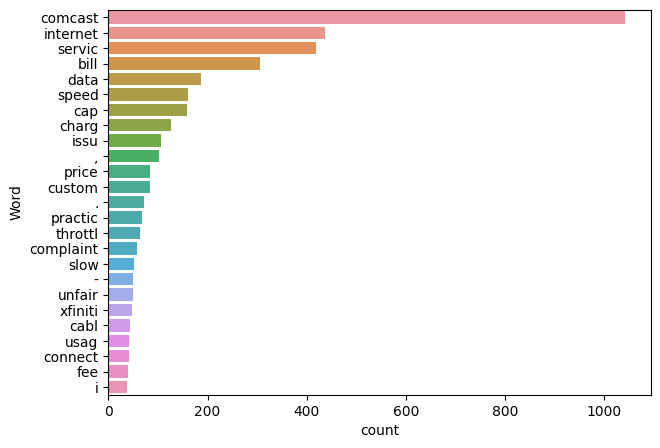

In [67]:
# visualising frewords

freq_df = showmostfrequentwords(train2['CustomerComplaint'],25)

In [68]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
0,comcast,1042
2,internet,437
7,servic,419
43,bill,306
23,data,187
3,speed,160
13,cap,158
21,charg,127
88,issu,106
98,",",102


In [72]:
#Performing tf-idf

tfidf_vectorizer = TfidfVectorizer(min_df=5)
xtrain_tfidf = tfidf_vectorizer.fit_transform(train2["CustomerComplaint"].tolist())
xtest_tfidf = tfidf_vectorizer.transform(test2["CustomerComplaint"].tolist())

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
plt.style.use('seaborn-bright')

In [75]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(train2['CustomerComplaint'], 20)
df1 = pd.DataFrame(common_words, columns = ['CustomerComplaint', 'count'])
df1.head()

,CustomerComplaint,count
0,comcast,1087
1,internet,453
2,servic,427
3,bill,306
4,data,187


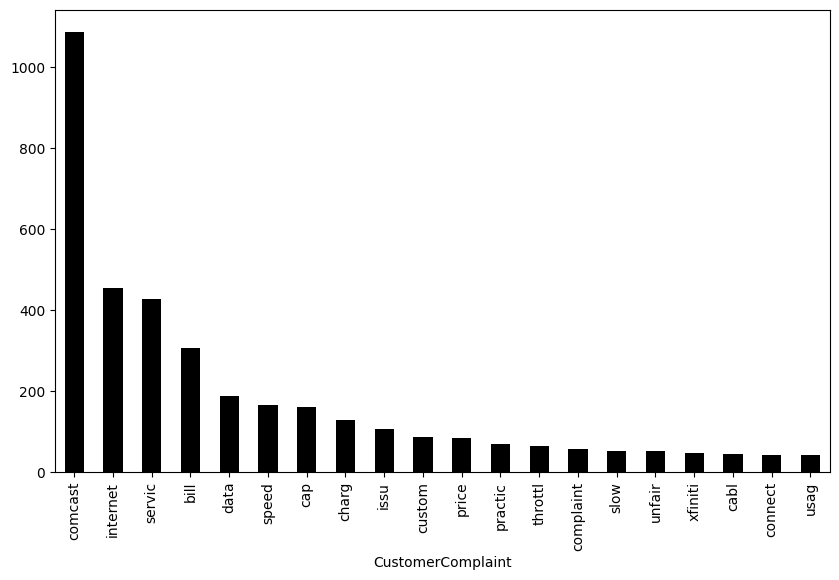

In [76]:
df1.groupby('CustomerComplaint').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='black',figsize = (10, 6))
xlabel = 'Top Words'
ylabel = 'Count'
title = 'BarChart represent the Top Words Frequency(Uni-Grams Analysis)'
plt.show()

In [77]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(train2['CustomerComplaint'], 30)
df3 = pd.DataFrame(common_words2, columns=['CustomerComplaint', "Count"])
df3.head()

,CustomerComplaint,Count
0,data cap,128
1,comcast internet,116
2,comcast data,92
3,internet servic,77
4,comcast bill,72


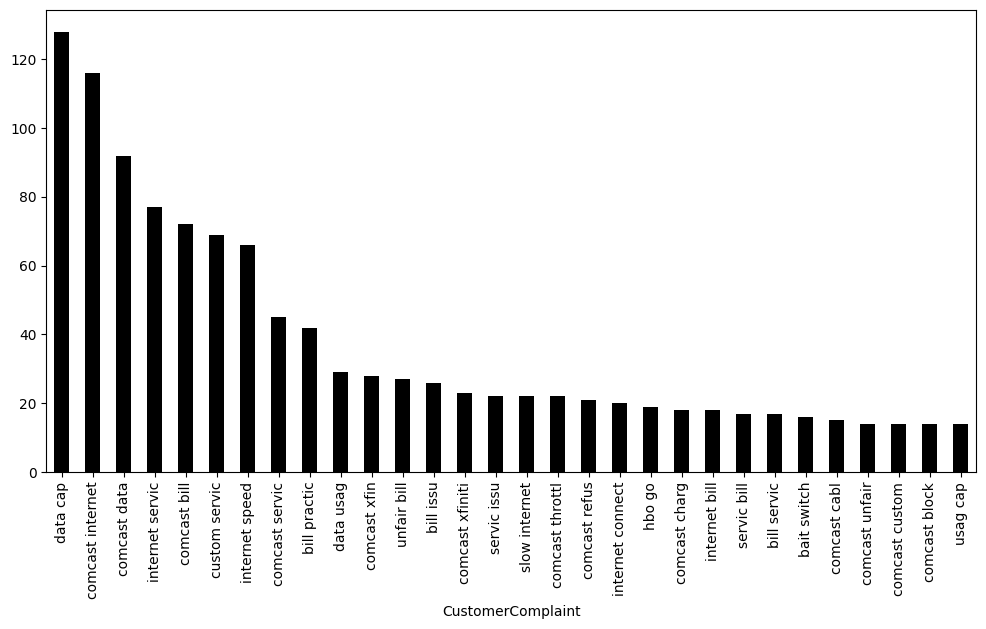

In [78]:
df3.groupby('CustomerComplaint').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Bigram Words"
ylabel = "Count"
title = "Bar chart of Bigrams Frequency"
plt.show()

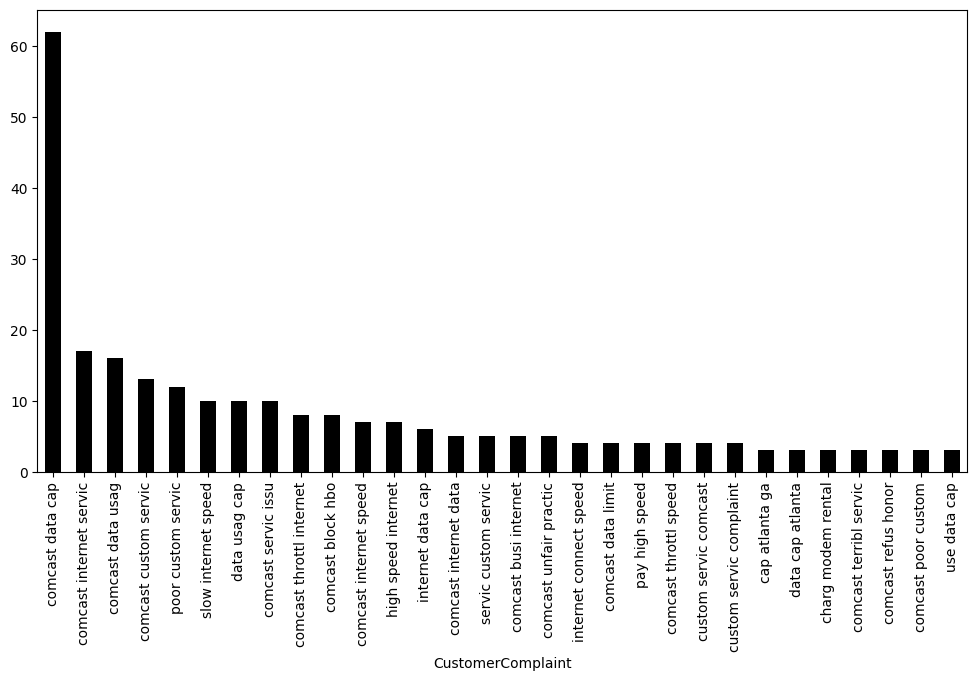

In [79]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words4 = get_top_n_trigram(train2['CustomerComplaint'], 30)
df4 = pd.DataFrame(common_words4, columns = ['CustomerComplaint' , 'Count'])
df4.groupby('CustomerComplaint').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Trigram Words"
ylabel = "Count"
title = "Bar chart of Trigrams Frequency"
plt.show()

In [80]:
#Performing tf-idf

count_vectorizer = CountVectorizer(min_df=5)
xtrain_count_cr = count_vectorizer.fit_transform(train2["CustomerComplaint"].tolist())
xtest_count_cr = count_vectorizer.transform(test2["CustomerComplaint"].tolist())

In [81]:
#Performing tf-idf

tfidf_vectorizer = TfidfVectorizer(min_df=5)
xtrain_tfidf_rd = tfidf_vectorizer.fit_transform(train2["CustomerComplaint"].tolist())
xtest_tfidf_rd = tfidf_vectorizer.transform(test2["CustomerComplaint"].tolist())

In [82]:
train2['CustomerComplaint_len'] = train2['CustomerComplaint'].astype(str).apply(len)
train2['word_count_CustomerComplaint'] = train2['CustomerComplaint'].apply(lambda x: len(str(x).split()))

In [83]:
test2['CustomerComplaint_len'] = test2['CustomerComplaint'].astype(str).apply(len)
test2['word_count_CustomerComplaint'] = test2['CustomerComplaint'].apply(lambda x: len(str(x).split()))

In [84]:
test2['average_word_len'] = test2["CustomerComplaint"].apply(lambda x: np.mean([len(w) for w in x.split()]))

In [85]:
train2['average_word_len'] = train2["CustomerComplaint"].apply(lambda x: np.mean([len(w) for w in x.split()]))

In [86]:
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer

In [87]:
train2['polarity'] = train2['CustomerComplaint'].map(lambda text: TextBlob(text).sentiment.polarity)
train2.head()

,Unnamed: 0,Ticket #,CustomerComplaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day,CustomerComplaint_len,word_count_CustomerComplaint,average_word_len,polarity
0,0,250635,comcast cabl internet speed,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,4,22,27,4,6.000000,0.000000
1,1,223441,payment disappear - servic get disconnect,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,4,8,41,6,6.000000,0.000000
2,2,242732,speed servic,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,4,18,12,2,5.500000,0.000000
3,3,277946,comcast impos new usag cap gb punish stream .,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,5,7,45,9,4.111111,0.136364
4,4,307175,comcast work servic boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,5,26,24,4,5.250000,0.000000


In [88]:
test2['polarity'] = test2['CustomerComplaint'].map(lambda text: TextBlob(text).sentiment.polarity)
test2.head()

,Unnamed: 0,Ticket #,CustomerComplaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day,CustomerComplaint_len,word_count_CustomerComplaint,average_word_len,polarity
0,1900,257349,comcast internet servic,25-Apr-15,8:09:47 PM,Internet,Silver Spring,Maryland,20903,Open,No,2015,4,25,23,3,7.0,0.0
1,1901,293593,email sdervic,16-May-15,6:05:47 PM,Customer Care Call,Sinking Spring,Pennsylvania,10608,Open,No,2015,5,16,13,2,6.0,0.0
2,1902,373797,complaint comcast,29-Jun-15,10:37:26 PM,Internet,Skokie,Illinois,60203,Closed,No,2015,6,29,17,2,8.0,-0.3
3,1903,216841,internet speed,04-Mar-15,4:04:30 PM,Internet,Slc,Utah,84124,Closed,No,2015,4,3,14,2,6.5,0.0
4,1904,370691,comcast internet complaint,28-Jun-15,1:23:56 AM,Customer Care Call,Slc,Utah,84105,Open,No,2015,6,28,26,3,8.0,-0.3


In [89]:
###! pip install vaderSentiment

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [91]:
analyzer = SentimentIntensityAnalyzer()

In [92]:
train2['compound'] = [analyzer.polarity_scores(x)['compound'] for x in train2['CustomerComplaint']]
train2['neg'] = [analyzer.polarity_scores(x)['neg'] for x in train2['CustomerComplaint']]
train2['neu'] = [analyzer.polarity_scores(x)['neu'] for x in train2['CustomerComplaint']]
train2['pos'] = [analyzer.polarity_scores(x)['pos'] for x in train2['CustomerComplaint']]

In [93]:
test2['compound'] = [analyzer.polarity_scores(x)['compound'] for x in test2['CustomerComplaint']]
test2['neg'] = [analyzer.polarity_scores(x)['neg'] for x in test2['CustomerComplaint']]
test2['neu'] = [analyzer.polarity_scores(x)['neu'] for x in test2['CustomerComplaint']]
test2['pos'] = [analyzer.polarity_scores(x)['pos'] for x in test2['CustomerComplaint']]

In [94]:
test2.columns

Index(['Unnamed: 0', 'Ticket #', 'CustomerComplaint', 'Date_month_year',
       'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'year', 'month', 'day',
       'CustomerComplaint_len', 'word_count_CustomerComplaint',
       'average_word_len', 'polarity', 'compound', 'neg', 'neu', 'pos'],
      dtype='object')

In [95]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    324 non-null    int64  
 1   Ticket #                      324 non-null    int64  
 2   CustomerComplaint             324 non-null    object 
 3   Date_month_year               324 non-null    object 
 4   Time                          324 non-null    object 
 5   Received Via                  324 non-null    object 
 6   City                          324 non-null    object 
 7   State                         324 non-null    object 
 8   Zip code                      324 non-null    int64  
 9   Status                        324 non-null    object 
 10  Filing on Behalf of Someone   324 non-null    object 
 11  year                          324 non-null    int64  
 12  month                         324 non-null    int64  
 13  day  

In [96]:
import scipy

In [97]:
X_train = scipy.sparse.hstack((xtrain_count_cr,
                               xtrain_tfidf_rd,
                         train2[[ 'CustomerComplaint_len', 'word_count_CustomerComplaint', 'average_word_len', 'polarity', 'compound', 'neg', 'neu', 'pos']].to_numpy())).tocsr()

In [98]:
X_test = scipy.sparse.hstack((xtest_count_cr,
                               xtest_tfidf_rd,
                         test2[[ 'CustomerComplaint_len', 'word_count_CustomerComplaint', 'average_word_len', 'polarity', 'compound', 'neg', 'neu', 'pos']].to_numpy())).tocsr()

In [99]:
train2['Status'].value_counts()

Solved     831
Closed     620
Open       321
Pending    128
Name: Status, dtype: int64

In [100]:
train2["Encoded_Status"] = train2['Status'].astype("category").cat.codes

In [101]:
test2["Encoded_Status"] = test2['Status'].astype("category").cat.codes

In [102]:
Y_train = train2["Encoded_Status"]

In [103]:
Y_test = test2["Encoded_Status"]

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics

In [105]:
###!pip install xgboost==0.90

### XGBClassifier

In [106]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [107]:
mb = XGBClassifier()
mb.fit(X_train,Y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(Y_test,mbpred))

0.41358024691358025


In [108]:
print('Baseline: Accuracy: ', round(accuracy_score(Y_test, mbpred)*100, 2))
print('\n Classification Report:\n', classification_report(Y_test,mbpred))

Baseline: Accuracy:  41.36

 Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.18      0.25       114
           1       0.29      0.05      0.08        42
           2       0.18      0.08      0.11        26
           3       0.44      0.77      0.56       142

    accuracy                           0.41       324
   macro avg       0.32      0.27      0.25       324
weighted avg       0.37      0.41      0.35       324



## Random Forest Classifier

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rfpred = rf.predict(X_test)
print(metrics.accuracy_score(Y_test,rf.predict(X_test)))

0.4444444444444444


In [110]:
#! pip install optuna

In [111]:
import optuna
import sklearn

In [112]:
param_grid_optuna = {
    "bootstrap": [True, False],
    "max_depth": [10, 20, 30, 40, 50, None],
    "max_features": ['auto', 'sqrt'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 8, 10, 12],
    "n_estimators": [100, 200, 300, 400, 500, 600]
}

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
def objective(trial):
    bootstrap = trial.suggest_categorical('bootstrap',[True, False])
    max_depth = trial.suggest_int('max_depth', 10, 50)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 12)
    n_estimators =  trial.suggest_int('n_estimators', 100, 600)

    clsr = RandomForestClassifier(bootstrap = bootstrap,
                                 max_depth = max_depth, max_features = max_features,min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split,n_estimators = n_estimators)


    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)

    score = cross_val_score(clsr, X_train, Y_train, cv=6, n_jobs=-1)
    meanvalue = score.mean()

    return meanvalue

In [115]:
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=12)

[I 2023-08-13 18:41:16,678] A new study created in memory with name: no-name-749baacc-3ca1-4749-bdda-e42a9d4f71b0
[I 2023-08-13 18:41:26,477] Trial 0 finished with value: 0.42156158074778044 and parameters: {'bootstrap': False, 'max_depth': 31, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 360}. Best is trial 0 with value: 0.42156158074778044.
[I 2023-08-13 18:41:34,179] Trial 1 finished with value: 0.4247261377098058 and parameters: {'bootstrap': True, 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 541}. Best is trial 1 with value: 0.4247261377098058.
[I 2023-08-13 18:41:35,669] Trial 2 finished with value: 0.4263117438006629 and parameters: {'bootstrap': True, 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 106}. Best is trial 2 with value: 0.4263117438006629.
[I 2023-08-13 18:41:41,829] Trial 3 finished with value: 0.4205100560369

In [116]:
#Create an instance with tuned hyperparameters
optimised_rf = RandomForestClassifier(bootstrap = study.best_params['bootstrap'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     min_samples_leaf = study.best_params['min_samples_leaf'],
                                     min_samples_split = study.best_params['min_samples_split'],
                                     n_estimators = study.best_params['n_estimators'])
#learn
optimised_rf.fit(X_train ,Y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=183)

In [117]:
optimised_rf.score(X_train ,Y_train)

0.5352631578947369

In [118]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.4310419411944788


In [119]:
study.best_params

{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 183}

In [120]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'bootstrap': True, 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 183}


In [121]:
optuna.visualization.plot_optimization_history(study)

In [122]:
y_pred_optuna = optimised_rf.predict(X_test)

In [123]:
y_pred_optuna = pd.DataFrame(y_pred_optuna)

In [124]:
y_pred_optuna.rename(columns = {0: "Predict"}, inplace=True)

In [125]:
y_pred_optuna.value_counts()

Predict
3          280
0           32
2            8
1            4
dtype: int64

In [126]:
class_names = {
3 : "Solved",
0 : "Closed",
1 : "Open",
2 : "Pending"
}

In [127]:
y_pred_optuna = y_pred_optuna['Predict'].map(class_names)


In [128]:
y_pred_optuna.value_counts()

Solved     280
Closed      32
Pending      8
Open         4
Name: Predict, dtype: int64